#1. Thêm thư viện

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras import utils
import tensorflow as tf
from tensorflow import keras


#2. Đường dẫn và mảng lưu trữ tên lớp

In [31]:
path = "Class/"
categories = ['Audi', 'hyundai', 'lexus', 'mazda', 'Mercedes', 'toyota', 'volkswagen','opel']


#3. Khởi tạo dữ liệu và lớp

In [48]:
data = []       #
labels = []     #Lưu chỉ số lớp
imagePaths = [] #Lưu trữ đường dẫn ảnh và chỉ số nhãn về nó

HEIGHT = 75
WIDTH = 75

N_CHANNELS = 3 #Kênh màu

#4.Xáo trộn đường dẫn 1 cách ngẫu nhiên lưu vào mảng "data" và đưa các hình ảnh về chung chuẩn

In [49]:
#Lưu đường dẫn và lớp và mảng imagePaths
for index ,name in enumerate(categories):
    for file in os.listdir(path+name):
        imagePaths.append([path+name+'/'+file, index])

#Xáo trộn dữ liệu
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

#Đưa các hình ảnh về kích cỡ tiêu chuẩn
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])            #Đọc hình ảnh thông qua đường dẫn
    image = cv2.resize(image, (WIDTH, HEIGHT))  #resize hình ảnh
    data.append(image)

    labels.append( int(imagePath[1]) )               #Lưu chỉ số theo ngẫu nhiên


#Tiền xử lý dữ liệu
data = np.array(data, dtype='float')/255
labels = np.array(labels)

print('Labels')
print(labels)
# print('Data')
# print(data)

[['Class/lexus/images39.jpg', 2], ['Class/lexus/images207.jpg', 2], ['Class/lexus/a34_rotate_180_37.jpg', 2], ['Class/lexus/images220_rotate_180_154.jpg', 2], ['Class/Audi/audi (1467).jpg', 0], ['Class/mazda/rBgICV3FBDeAP38CAAAsOzSFp3w408.jpg', 3], ['Class/hyundai/images172_rotate_180_72.jpg', 1], ['Class/Mercedes/mercede (25).jpg', 4], ['Class/volkswagen/images143_rotate_180_83.jpg', 6], ['Class/mazda/default_rotate_90_150.jpg', 3]]
Labels
[2 2 2 ... 2 4 6]


<h2>5# Chia tập dữ liệu</h2>

In [50]:

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.3, random_state=42)

#Tiền xử lý các lớp
Y_train = utils.to_categorical(Y_train, num_classes=len(categories))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(4743, 75, 75, 3)
(2034, 75, 75, 3)
(4743, 8)
(2034,)


#6. Các thông số quan trọng

In [51]:
EPOCH = 35  #Số lần học lại
BS = 24 #Số cụm học
INIT_LR = 1e-3

class_name = categories

#7.1 Mô hình kiến trúc xây dựng lenet

In [62]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(WIDTH, HEIGHT, N_CHANNELS)))
model.add(MaxPooling2D(strides=2))
model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(Flatten())        #Chuyền từ 2D or 3D sang 1D
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR/EPOCH )
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, batch_size=BS, epochs=EPOCH, verbose=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_945 (Conv2D)         (None, 75, 75, 32)        2432      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_946 (Conv2D)         (None, 33, 33, 32)        25632     
                                                                 
 flatten_8 (Flatten)         (None, 34848)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               8921344   
                                                                 
 dense_14 (Dense)            (None, 84)                21588     
                                                     

#7.2 Mô hình kiến trúc xây dựng InceptionV3

In [78]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

print("[INFO] compiling model...")

input_shape = (75, 75, 3)
num_classes = len(class_name)  # Provide the correct number of classes

base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCH)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


#8. Lưu mô hình và đánh giá mô hình

64/64 [==============================] - 25s 325ms/step


C:\Users\VTOS\AppData\Local\Temp\ipykernel_10356\3985579406.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+ categories)
C:\Users\VTOS\AppData\Local\Temp\ipykernel_10356\3985579406.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+ categories)


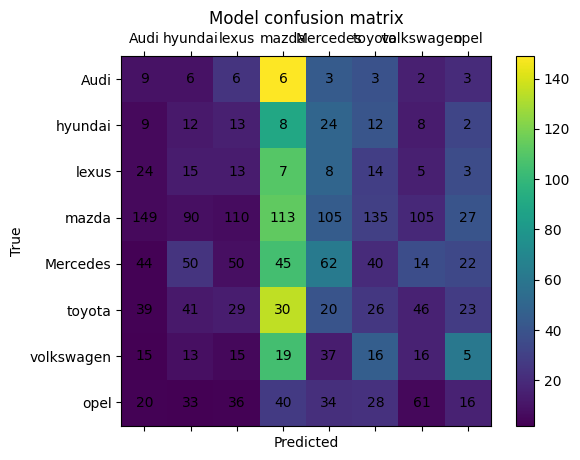

In [79]:
model.save_weights('inceptionV3.h5')

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)
predictions = argmax(pred, axis=1)  #trả đến nhãn

cm = confusion_matrix(Y_test, predictions) #Ma trận tương quan

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['']+ categories)
ax.set_yticklabels(['']+ categories)

for i in range(len(categories)): 
    for j in range(len(categories)):
        ax.text(i, j, cm[i,j], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#9. Xác định độ chính xác

In [80]:
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy: %.2f%%' %(accuracy*100))

Accuracy: 13.13%


#10. Đánh giá mô hình và dự đoán

In [81]:
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

img_path = "Audi/audi (780).jpg"

img = image.load_img(img_path, target_size=(32,32))
img_preprocessed = np.array(img, dtype='float')/ 255

pred = model.predict(img_preprocessed)
Res = argmax(pred, axis=1)      #Trả về lớp
print(pred)

Result_Text = "{0} ({1})".format(categories[Res[0]], round(pred[0][Res[0]] *100,2))
plt.text(10,10, Result_Text, color="blue", fontsize='large', bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.imshow(img)
plt.show()
print(categories[Res[0]], pred[0][Res[0]] *100)

FileNotFoundError: [Errno 2] No such file or directory: 'Audi/audi (780).jpg'